## Data Science Final Project Report: Predicting Player Playtime in a Minecraft Research Server


**Group Members**:


Han Nguyen     

Vincent Nguyen

Sanuli Weihena Gamage

Huixin Zhang



# Introduction

### Background information & Research question

Understanding player behavior is essential for optimizing resources and improving user experience in online gaming environments. In this project, we analyze data collected from a Minecraft research server operated by a UBC Computer Science research group led by Frank Wood. The server records player actions, providing valuable insights into gaming patterns. However, managing such a project requires careful resource allocation, ensuring sufficient server capacity and targeted recruitment strategies. To support these efforts, we investigate key player characteristics that may influence their engagement.

We start with the broad question of interest:

**We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.**

Then, we come to a narrower question, focusing on the predictiveness of some features of players to the amount of data they contributed, as follows:

**Can the experience and age of players (predictors) accurately predict their total play time (response variable) using multivariate K-Nearest Neighbors (KNN) and multivariate linear regression?** 

To address this, we focus on the `players.csv` dataset, which contains relevant features such as player age, experience level, and total playtime. The `sessions.csv` dataset, which logs individual gameplay sessions, is not directly useful for this analysis since we are interested in aggregated player behavior rather than session-specific details. By applying predictive modeling techniques, we aim to uncover meaningful relationships between player attributes and their total playtime, providing actionable insights for the research team.

### Data description

`players.csv` dataset : A list of all unique players, including data about each player. From this dataset with 196 observations, there are 7 variables we can look at:

| Variable name | Description | Type   |
| :-----------: | :------     | :----: |
| experience    | player's experience level (Pro, Veteran, Amateur, Regular, Beginner) | character |
| subscribe     | whether the player subscribed to the newsletter | logical   |
| hashedEmail   | hashed version of player's email used to play the game | character |
| played_hours  | total time played, in hours                            | numerical |
| name          | player's name | character |
| gender        | player's gender (Male, Female, Agender, Non-binary, Two-Spirited, Other, Prefer not to say) | character |
| played_hours  | age of player                                          | numerical |


# Methods & Results:

**Method**: We began by analyzing the dataset to explore key variables — `experience`, `Age`, and `played_hours`—and to understand the relationships between them through visualizations and summaries. After gaining these initial insights, we applied a K-Nearest Neighbors (KNN) regression model to assess how well `experience` and `Age` could predict `played_hours`, collected the RMSPE value, and visualized the model's predictions. We then repeated this process using a linear regression model to compare its performance against the KNN approach.

### 1. Data analysis

In [1]:
# Loads the library
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)
library(ggplot2)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In my group, we want to know: *Can the experience and age of players (predictors) accurately predict their total play time (response variable) using multivariate K-Nearest Neighbors (KNN) and multivariate linear regression?*

The `player_csv` is suitable for observing private information about players.

In [2]:
# Loads the dataset
url <- "https://raw.githubusercontent.com/Han27-io/ds-project/refs/heads/main/players%20(1).csv"
players <- read_csv(url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


From the dataset, we figure out some valuable insights below:
- Variables ‘experience’ and ‘gender’ are imported as character data types but should be converted into factor data types as they’re actually categorical with a limited number of values.
- Age has 2 missing values.

With regard to our research question, `subscribe`, `hashedEmail`, `name`, and `gender` can be disselected since they won't contribute to the further analysis. Additionally, there are 2 missing values of variable `Age`, which are insignificant compared to 196 observations in total; we delete them to make wrangling and visualizing steps easier.

In [3]:
# Wrangles the data
players_tidy <- players |>
                select(experience, played_hours, Age) |>
                filter(Age != "NA") |>
                mutate(experience = factor(experience))
players_tidy

experience,played_hours,Age
<fct>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
⋮,⋮,⋮
Veteran,0.3,22
Amateur,0.0,17
Amateur,2.3,17


In order to hypothesize the predictiveness of age and experience level about the total playtime, we visualize the graph of the predictors and the response variable.

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

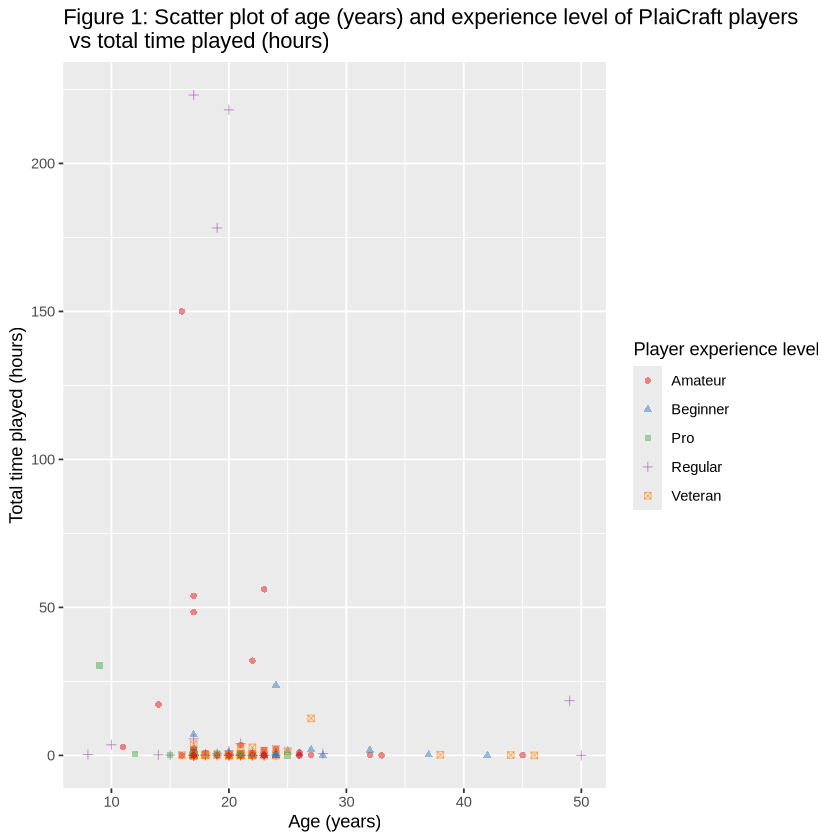

In [25]:
options(repr.height.plot = 8, repr.width.plot = 15)
# Visualizes the scatter plot showing the relationship between predictors and response variable
players_scatter_plot <- players_tidy |> 
ggplot(aes(x = Age, y = played_hours, color = experience, shape = experience)) + 
geom_point(alpha = 0.5) + 
labs(title = "Figure 1: Scatter plot of age (years) and experience level of PlaiCraft players \n vs total time played (hours)", x = "Age (years)", y = "Total time played (hours)", color = "Player experience level", shape = "Player experience level") + 
scale_color_brewer(palette = "Set1")
theme(text = element_text(size = 12))

players_scatter_plot

Due to outliers at the extremities of the x- and y-axis, it’s difficult to take value insights from the graph. Instead, we can split the graph into two bar graphs to better display the relationship between each predictor and response variable.

In [5]:
# Creates the table of mean playtime and total oservation of each category of experience
played_hours_experience <- players_tidy |> 
                                group_by(experience) |> 
                                summarize(avg_hours = mean(played_hours), count = n())
played_hours_experience

experience,avg_hours,count
<fct>,<dbl>,<int>
Amateur,6.0174603,63
Beginner,1.2485714,35
Pro,2.7846154,13
Regular,18.7257143,35
Veteran,0.6479167,48


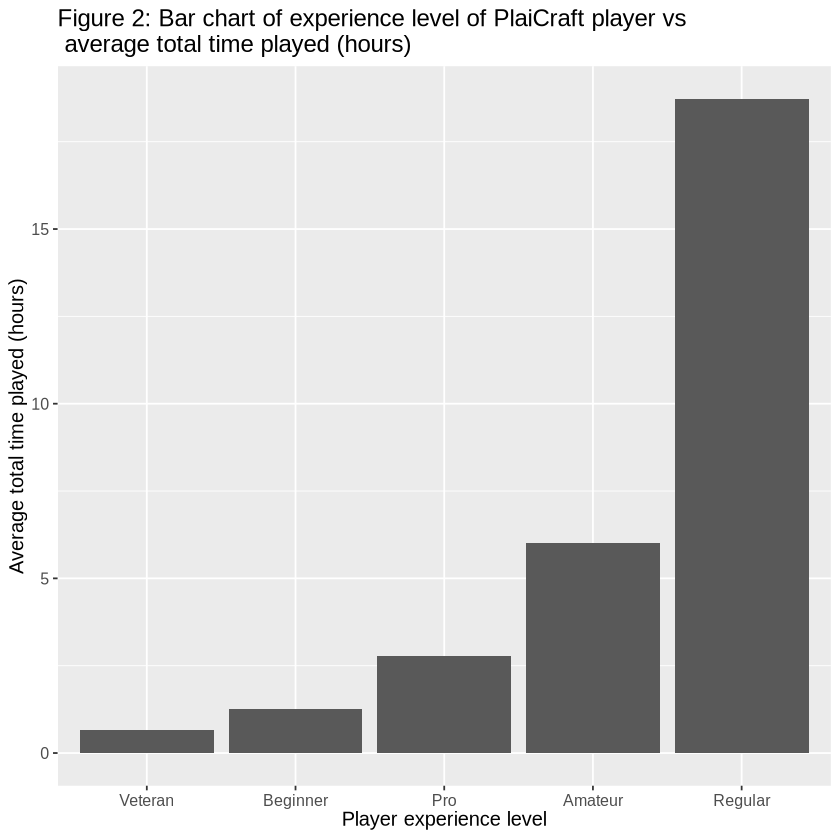

In [26]:
# Visualizes the bar graph between the avarage played time and categories of experience
experience_aver_bar_plot <- played_hours_experience |> 
ggplot(aes(x = fct_reorder(experience, avg_hours, .desc = FALSE), y = avg_hours)) + 
geom_bar(stat = "identity") + 
labs(x = "Player experience level", 
     y = "Average total time played (hours)",
     title = "Figure 2: Bar chart of experience level of PlaiCraft player vs \n average total time played (hours)") + 
theme(text = element_text(size = 12))

experience_aver_bar_plot

- Regular players have the highest playtime, while Veterans surprisingly have the lowest.
- Beginners also play less, but that makes sense since they are new.
- Amateurs play more than Pros, suggesting skill level isn’t directly tied to playtime.
- This non-linear relationship suggests that experience level may be a more complex predictor than expected.

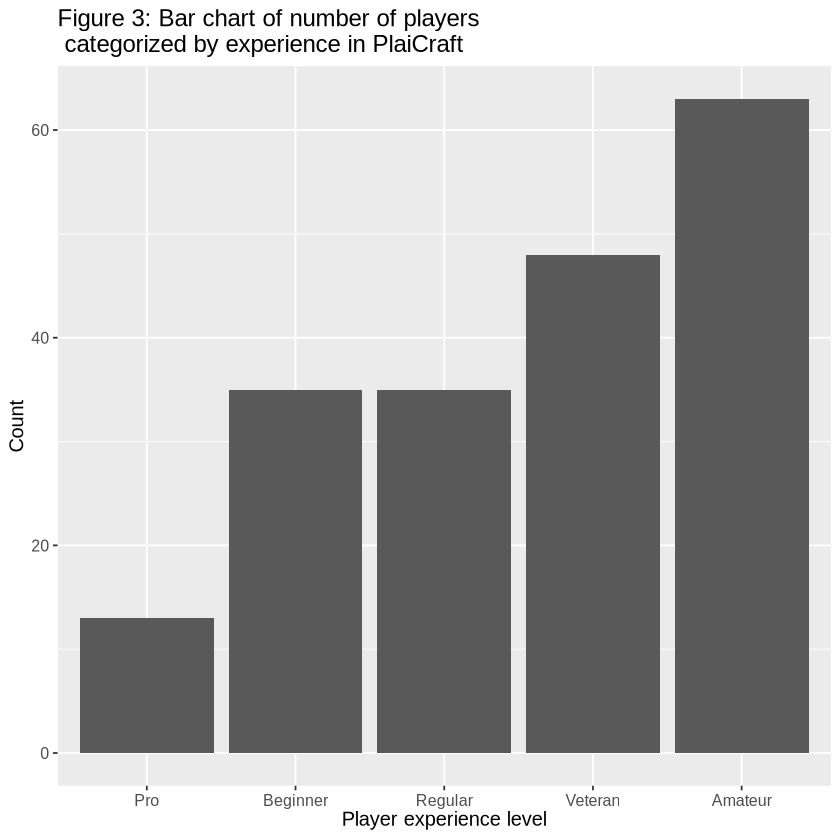

In [28]:
# Visualizes the bar graph of the total number of observations of each category of experience
experience_count_bar_plot <- played_hours_experience |> 
ggplot(aes(x = fct_reorder(experience, count, .desc = FALSE), y = count)) + 
geom_bar(stat = "identity") + 
labs(x = "Player experience level", 
     y = "Count",
     title = "Figure 3: Bar chart of number of players \n categorized by experience in PlaiCraft") + 
theme(text = element_text(size = 12))

experience_count_bar_plot

- The majority of players are Amateurs and Veterans.
- Beginners and Regulars have even distribution.
- Pros is the least common.
- There is a clear imbalance in experience distribution, which might influence predictions.

In [8]:
# Creates the table of the mean playtime and total number of observations of each age
played_hours_age <- players_tidy |> 
                        group_by(Age) |> 
                        summarize(avg_hours = mean(played_hours),
                                 count = n())
played_hours_age

Age,avg_hours,count
<dbl>,<dbl>,<int>
8,0.3,1
9,30.3,1
10,3.6,1
⋮,⋮,⋮
46,0.0,1
49,18.5,1
50,0.0,1


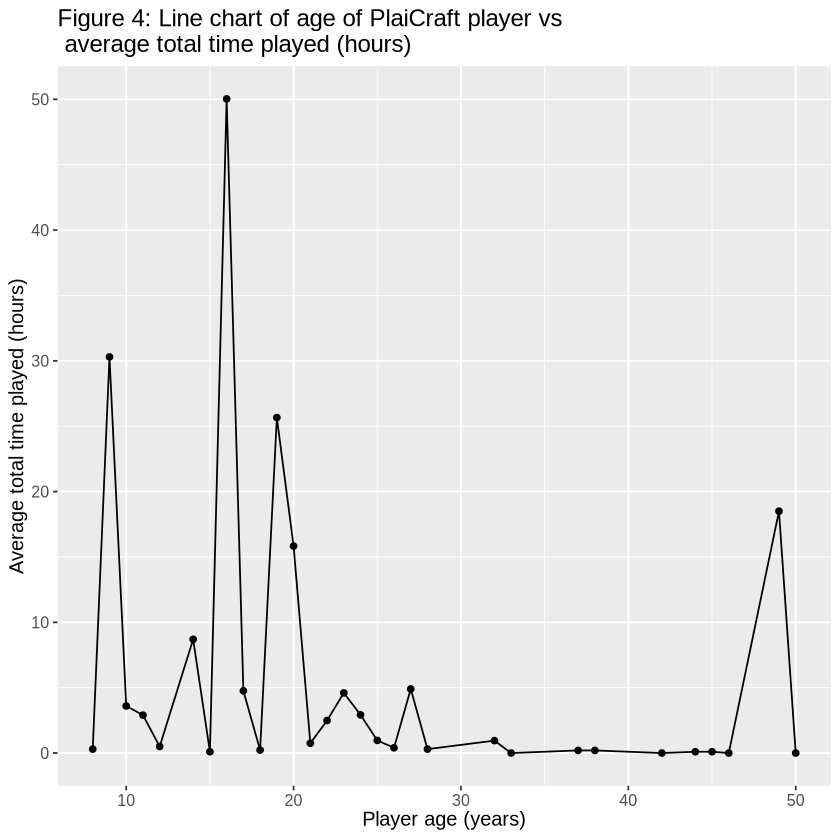

In [29]:
# Visualizes the line graph between the avarage played time and ages
age_aver_bar_plot <- played_hours_age |> 
ggplot(aes(x = Age, y = avg_hours)) + 
geom_line() + 
geom_point() +
labs(x = "Player age (years)", 
     y = "Average total time played (hours)", 
     title = "Figure 4: Line chart of age of PlaiCraft player vs \n average total time played (hours)") + 
theme(text = element_text(size = 12))

age_aver_bar_plot

- There is no clear linear trend between age and playtime.
- Some younger players (9 and 15-20) and some older players (49) have high playtime, but most of the playtime is scattered and inconsistent.
- Peak playtime happens at certain ages (e.g., 9, 16, 49) but not consistently across all ages.
- This suggests that age alone is not a strong predictor of playtime.

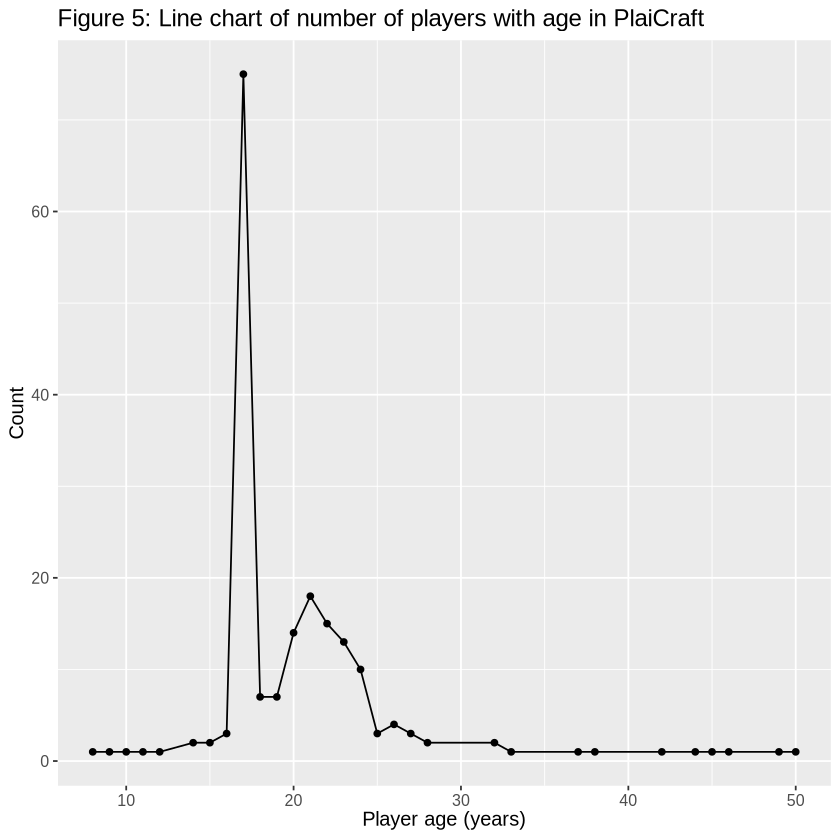

In [30]:
# Visualizes the line graph of the number of observation for each age
age_count_line_plot <- played_hours_age |> 
ggplot(aes(x = Age, y = count)) + 
geom_line() + 
geom_point() +
labs(x = "Player age (years)", 
     y = "Count", 
     title = "Figure 5: Line chart of number of players with age in PlaiCraft") + 
theme(text = element_text(size = 12))

age_count_line_plot

- The majority of players are clustered between ages 17–22, with a massive spike at age 17.
- There are fewer younger (below 15) and older (above 30) players.
- The distribution is highly imbalanced, which may affect predictive accuracy.

We also need to know the range as well as the mean value of the total playtime (response variable) in order to assess the effectiveness of the prediction later.

In [11]:
played_hours_stat <- players_tidy |>
                     summarize(mean = mean(played_hours),
                               range = max(played_hours) - min(played_hours),
                               min = min(played_hours),
                               max = max (played_hours))
played_hours_stat

mean,range,min,max
<dbl>,<dbl>,<dbl>,<dbl>
5.904639,223.1,0,223.1


Based on the value above, we know that the mean value of total playtime is $5.90$ hours, while the spread of the value is from $0$ to $223.1$ hours.

After the analysis, we come to the hypothesis:

**Experience level and age together can moderately predict total playtime, but their relationship with playtime is non-linear, meaning K-Nearest Neighbors (KNN) will provide better predictions than linear regression.**

### 2. Pre-process data

Since both models we're using to predict directly applying the Euclid distance formula, we need to convert all the predictors into numeric values, specifically the `experience` variable.

Additionally, we will split the dataset into training and testing sets (75% training and 25% testing).

In [12]:
# Converts experience values into numbers
players_pre <- players_tidy |>
               mutate(experience = as.numeric(experience))

players_pre

experience,played_hours,Age
<dbl>,<dbl>,<dbl>
3,30.3,9
5,3.8,17
5,0.0,17
⋮,⋮,⋮
5,0.3,22
1,0.0,17
1,2.3,17


In [13]:
set.seed(7)
# Spits the dataset
players_split <- initial_split(players_pre, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

### 3. Performing & Testing K-Nearest Neighbor Model

First, we gonna use KNN model to predict the `played_hours` variable with 2 predictors `Age` and `experience`. We will follow the following steps:

1. Training the model
2. Tuning the model
3. Choosing the best $K$ based on RMSE value
4. Applying the model for the testing set and collect the RMSPE
5. Visualizing the predicted and actual value to visually gain insight of the model

In [14]:
set.seed(7)
# Trains the model

players_recipe <- recipe(played_hours ~ experience + Age, data = players_training) |>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular",
                                 neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("regression")

players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)

players_wkflw <- workflow() |>
                 add_recipe(players_recipe) |>
                 add_model(players_spec)

players_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [15]:
set.seed(7)
# Tunes the models
gridvals <- tibble(neighbors = seq(from = 1, to = 60, by = 1))

players_results <- players_wkflw |>
                   tune_grid(resamples = players_vfold, grid = gridvals) |>
                   collect_metrics() |>
                   filter(.metric == "rmse")

players_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,30.57075,5,11.969150,Preprocessor1_Model01
2,rmse,standard,30.87461,5,9.370499,Preprocessor1_Model02
3,rmse,standard,30.74266,5,7.554933,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
58,rmse,standard,24.98334,5,8.781388,Preprocessor1_Model58
59,rmse,standard,24.91795,5,8.815540,Preprocessor1_Model59
60,rmse,standard,24.90914,5,8.823751,Preprocessor1_Model60


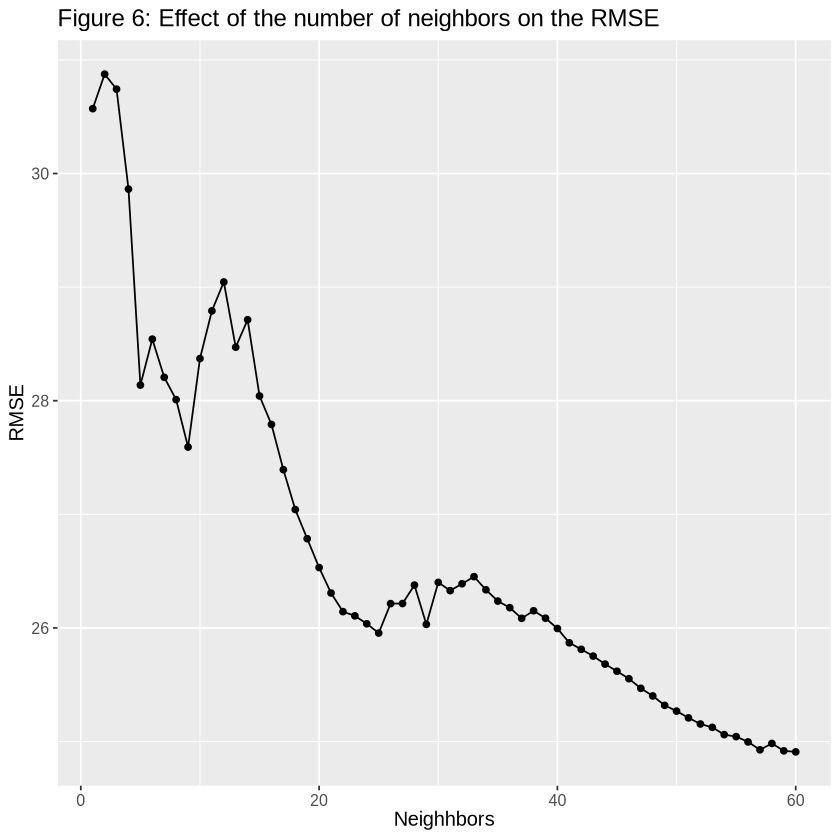

In [31]:
# Visualizes the RMSE value for each K
k_plot <- ggplot(players_results, aes(x = neighbors, y = mean)) +
          geom_point() +
          geom_line() +
          labs(x = "Neighhbors",
               y = "RMSE",
               title = "Figure 6: Effect of the number of neighbors on the RMSE") +
          theme(text = element_text(size = 12))

k_plot

In [17]:
# Choose the K value with smallest RMSE value
players_min <- players_results |>
               filter(mean == min(mean))

players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
60,rmse,standard,24.90914,5,8.823751,Preprocessor1_Model60


From the result above, we chose $K=60$ as it gives the lowest $RMSE$ value.

In [18]:
set.seed(7)
# Performs the model with approriate K value 

kmin <- players_min |> pull(neighbors)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  fit(data = players_training)

players_summary <- players_fit |>
  predict(players_testing) |>
  bind_cols(players_testing)

knn_rmspe <-  players_summary |>
              metrics(truth = played_hours, estimate = .pred) |>
              filter(.metric == 'rmse')
knn_rmspe

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,22.80067


For the KNN model, I obtained an RMSE of $24.91$ and an RMSPE of $22.80$. Given that the mean of the actual played_hours values is only $5.9$, the prediction error is disproportionately large, indicating that the model performs poorly. This suggests that `experience` and `Age` combination is a weak predictor of total playtime in this dataset.

To further demonstrate this, I created a plot comparing the predicted `played_hours` values to the actual values, highlighting the substantial differences between them.

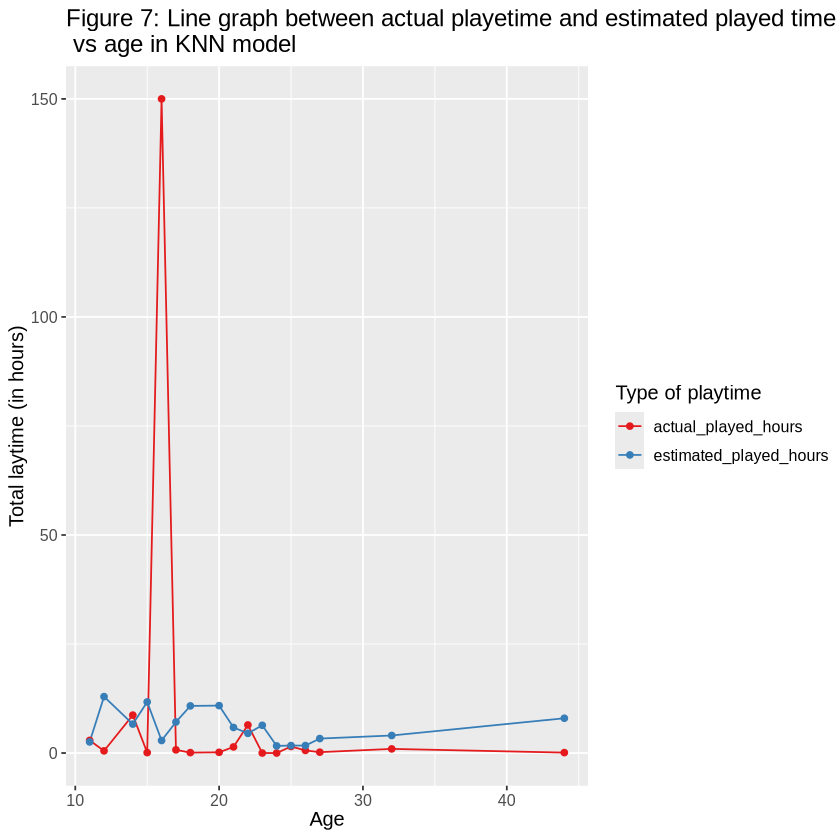

In [32]:
# Visualizes graph between actual playetime and estimated played time vs age in KNN model

knn_played_hours_age <- players_summary |>
                        group_by(Age) |>
                        summarize(actual_played_hours = mean(played_hours),
                                  estimated_played_hours = mean(.pred)) |>
                        pivot_longer(cols = actual_played_hours:estimated_played_hours,
                                     names_to = "type",
                                     values_to = "hours")

knn_age_plot <- ggplot(knn_played_hours_age, aes(x = Age, y = hours, color = type)) +
                geom_line() +
                geom_point() +
                labs(x = "Age",
                     y = "Total laytime (in hours)",
                     color = "Type of playtime",
                     title = "Figure 7: Line graph between actual playetime and estimated played time \n vs age in KNN model") +
                scale_color_brewer(palette = "Set1") +
                theme(text = element_text(size = 12))
knn_age_plot

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

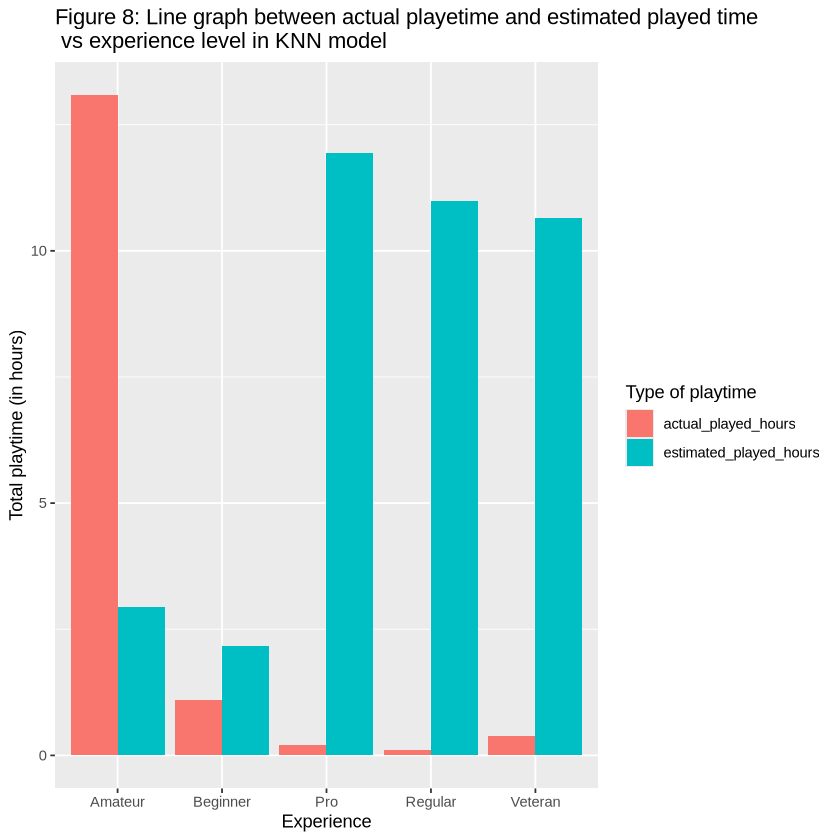

In [33]:
# Visualizes graph between actual playetime and estimated played time vs experience in KNN model

labels <- c("Amateur", "Amateur", "Beginner", "Beginner", "Pro", "Pro", "Regular", "Regular", "Veteran", "Veteran")
knn_played_hours_experience <- players_summary |>
                               group_by(experience) |>
                               summarize(actual_played_hours = mean(played_hours),
                                         estimated_played_hours = mean(.pred)) |>
                               pivot_longer(cols = actual_played_hours:estimated_played_hours,
                                            names_to = "type",
                                            values_to = "hours") 

knn_played_hours_experience['experience'] <- labels

knn_experience_plot <- ggplot(knn_played_hours_experience, aes(x = experience, y = hours, fill = type)) +
                       geom_bar(stat = "identity", position = "dodge") +
                       labs(x = "Experience",
                            y = "Total playtime (in hours)",
                            fill = "Type of playtime",
                            title = "Figure 8: Line graph between actual playetime and estimated played time \n vs experience level in KNN model") +
                       scale_color_brewer(palette = "Set1")
                       theme(text = element_text(size = 12))
knn_experience_plot

The visualization of actual vs. predicted `played_hours` reveals large discrepancies, highlighting a significant bias in the model's predictions. This is maybe due to the high variability in the data and the limited number of observations for each combination of predictors. When the dataset is split into training and testing sets, the distribution of `played_hours` can become unbalanced, especially for extreme values like $0$ or $223.1$. For example, if the training set lacks high playtime values, the model cannot learn to predict them accurately. **Despite these challenges, the KNN model remains a weak predictor for this dataset, as reflected by its high RMSPE compared to mean value, indicating poor generalization regardless of data distribution issues.**

### 4. Performing Linear Regression Model

Now, we're going to use Linear Regression model to predict the `played_hours` variable with 2 predictors `Age` and `experience`. We will follow the following steps:

1. Training the model
2. Applying the model for the testing set and collect the RMSPE
3. Visualizing the predicted and actual value to visually gain insight of the model

In [21]:
set.seed(7)
# Trains the model
lm_spec <- linear_reg() |>
           set_engine("lm") |>
           set_mode("regression")

lm_recipe <- recipe(played_hours ~ experience + Age, data = players_training)

lm_fit <- workflow() |>
          add_recipe(lm_recipe) |>
          add_model(lm_spec) |>
          fit(data = players_training)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)   experience          Age  
     7.6761       1.2740      -0.2396  


From the training model, we come to the equation of the line of best fit is:
`played_hours`$ = 7.6161 + 1.2749 * $ `experience` $ - 0.2396 * $`Age`

In [22]:
set.seed(7)

# Fits the models and collect the RMSPE value
lm_test_results <- lm_fit |>
                   predict(players_testing) |>
                   bind_cols(players_testing)

lm_rmspe <- lm_test_results |>
            metrics(truth = played_hours, estimate = .pred) |>
            filter(.metric == "rmse")

lm_rmspe

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,22.14188


For the linear regression model, I obtained an RMSPE of $22.14$. Found that the mean of the actual played_hours values is only $5.9$, the prediction error is disproportionately large, indicating that the model performs poorly. This suggests that `experience` and `Age` combination is a weak predictor of total playtime in this dataset.

To further demonstrate this, I created a plot comparing the predicted `played_hours` values to the actual values, highlighting the substantial differences between them.

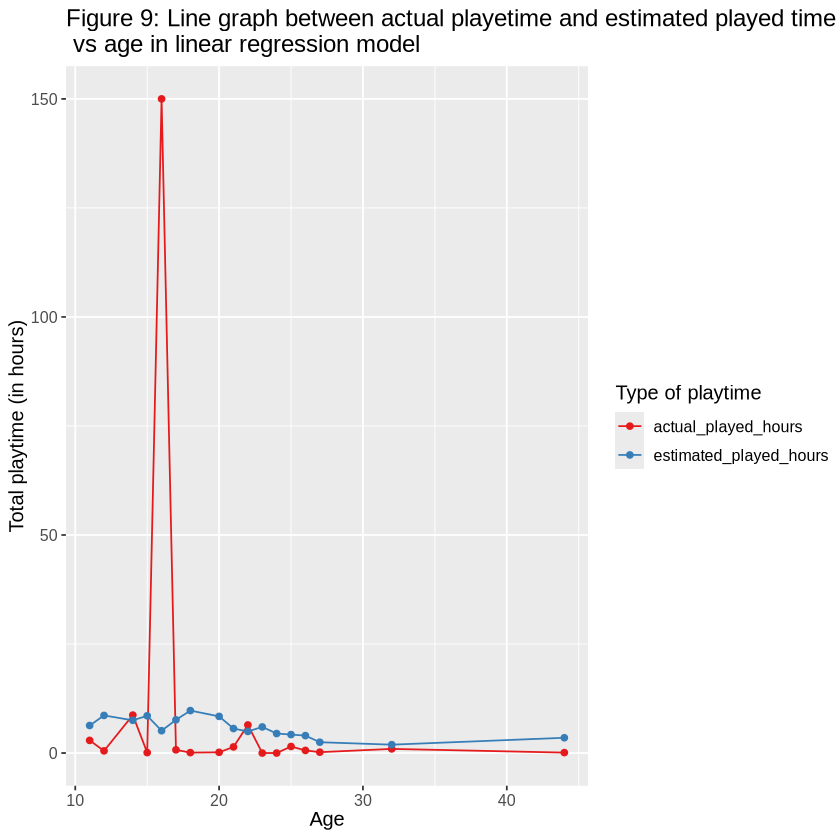

In [34]:
# Visualizes graph between actual playetime and estimated played time vs age in linear regression model

lm_played_hours_age <- lm_test_results |>
                       group_by(Age) |>
                       summarize(actual_played_hours = mean(played_hours),
                                 estimated_played_hours = mean(.pred)) |>
                       pivot_longer(cols = actual_played_hours:estimated_played_hours,
                                    names_to = "type",
                                    values_to = "hours")

lm_age_plot <- ggplot(lm_played_hours_age, aes(x = Age, y = hours, color = type)) +
                geom_line() +
                geom_point() +
                labs(x = "Age",
                     y = "Total playtime (in hours)",
                     color = "Type of playtime",
                     title = "Figure 9: Line graph between actual playetime and estimated played time \n vs age in linear regression model") +
                scale_color_brewer(palette = "Set1") +
                theme(text = element_text(size = 12))
lm_age_plot

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

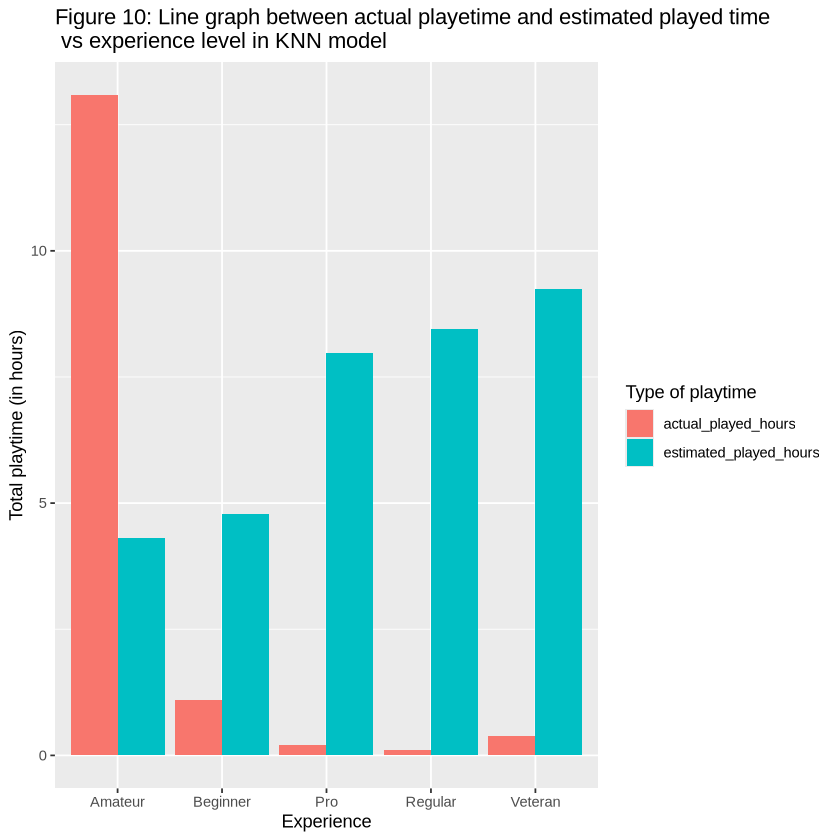

In [35]:
# Visualizes graph between actual playetime and estimated played time vs experience in linear regression model

lm_played_hours_experience <- lm_test_results |>
                              group_by(experience) |>
                              summarize(actual_played_hours = mean(played_hours),
                                        estimated_played_hours = mean(.pred)) |>
                              pivot_longer(cols = actual_played_hours:estimated_played_hours,
                                           names_to = "type",
                                           values_to = "hours")

lm_played_hours_experience['experience'] <- labels

lm_experience_plot <- ggplot(lm_played_hours_experience, aes(x = experience, y = hours, fill = type)) +
                       geom_bar(stat = "identity", position = "dodge") +
                       labs(x = "Experience",
                            y = "Total playtime (in hours)",
                            fill = "Type of playtime",
                            title = "Figure 10: Line graph between actual playetime and estimated played time \n vs experience level in KNN model") +
                       scale_color_brewer(palette = "Set1")
                       theme(text = element_text(size = 12))
lm_experience_plot

The visualization of actual vs. predicted `played_hours` reveals large discrepancies, highlighting a significant bias in the model's predictions. This is maybe due to the high variability in the data and the limited number of observations for each combination of predictors. When the dataset is split into training and testing sets, the distribution of `played_hours` can become unbalanced, especially for extreme values like $0$, $223.1$. For example, if the training set lacks high playtime values, the model cannot learn to predict them accurately. **Despite these challenges, the linear regression model remains a weak predictor for this dataset, as reflected by its high RMSPE compared to mean value, indicating poor generalization regardless of data distribution issues.**

# Discussion

### Summary of Result
- The analysis of the two models indicates that age and experience exhibit limited predictive power due to the high error values (RMSPE) relative to the mean, underscoring their insufficiency as valid predictors of game playtime.
- Furthermore, since both models yield quite similar mean values coupled with consistently high error margins, it is not possible to determine which model provides better prediction of their influence on total playtime.

### Expectation & Reality

While we initially hypothesized that the combination of experience level and age as predictors of total playtime is moderate, it turned out to be weak. Additionally, we thought the non-linear relationship between predictors and playtime would allow KNN to outperform linear regression; the results showed that both models struggled to make accurate predictions. Although KNN performed slightly better in terms of RMSPE value, the difference was not substantial, and neither model achieved acceptable accuracy. Visualization of actual vs. predicted values further confirmed a significant mismatch, highlighting that splitting the dataset into training and testing subsets likely introduced bias, especially due to the imbalanced distribution of played_hours. Some subsets lacked either high or low values, limiting the models’ ability to generalize.

### Impact of Findings
- Through summarization, we found that players aged 16-22 contributed the most data when summarizing the data, indicating that this age group is highly engaged in the game. This suggests that Minecraft attracts a significant number of younger players, and understanding their preferences and behaviors could be crucial for game developers looking to tailor content and improve player retention within this demographic.
- By summarization, Our analysis revealed that regular players contributed the most data, highlighting that players who engage with the game more frequently tend to generate more data during gameplay. This finding emphasizes the importance of considering engagement patterns when analyzing player behavior, as regular players may provide more consistent and valuable data compared to casual players
- By regression, we suggest that experience level and age alone are insufficient predictors of total playtime. This has practical implications for organizations aiming to target high-contributing players. Since regular players contributed the most data, relying solely on age and experience as predictors may lead to ineffective recruitment strategies. To improve targeting, additional variables such as player engagement patterns, frequency of participation, or game type preferences should be considered for more accurate predictions and a deeper understanding of player behavior.

### Future questions

1. To have a more precise result, it will be better to have more predictors in the models. We came up with the question: What additional factors might better predict total playtime?
2. In the future study we can put the model on the causation. Beside the relationship, we can come up with the question: Does higher experience cause longer playtime, resulting in higher experience?
3. We can try with other models of prediction with the question: Would using more complex models like decision trees or ensemble methods yield stronger results?

By addressing these issues, future research can build on our work to improve prediction accuracy and support better decision-making.